In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


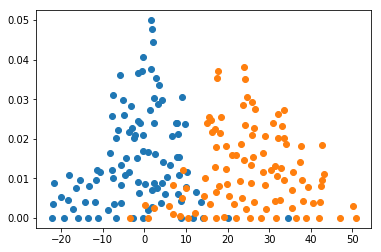

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def tri(x,x0,d):
    return np.maximum(np.zeros_like(x),(d-np.abs(x-x0))/(d)**2)
def stackit( arr ):
    N = len(arr)
    vsort=np.sort(arr)
    diff=4*np.average(np.array(vsort[1:]-vsort[:-1]))
    x = np.linspace(min(arr),max(arr),2001)
    height = np.zeros(len(x))
    disp=  np.zeros(len(arr)) 
    #stdev=np.std(arr)
    for i,v in enumerate(arr):
        ix = (np.abs(x - v)).argmin()
        disp[i] = height[ix]
        #height = height + np.exp(-((v-x)*2/stdev)**2)
        height = height + tri(x,v,diff)/N
        #plt.plot(x,height)
    return disp
arr1 = np.random.randn(100)*10
arr2 = np.random.randn(100)*10+25

plt.plot(arr1,stackit(arr1),'o')
plt.plot(arr2,stackit(arr2),'o')
vals,bins=np.histogram(arr2,density=True)
#plt.plot(bins[1:],vals)

In [22]:
def plot_samples(mu, sd, N):
    arr1 = np.random.randn(N)*sd
    arr2 = np.random.randn(N)*sd+mu
    bins = np.linspace(-10,40,61)
    #plt.hist(arr1,bins=bins,alpha=0.2,density=True)
    #plt.hist(arr2,bins=bins,alpha=0.2,density=True)
    plt.xlim(-10,20)
    plt.ylim(0,0.35)
    plt.plot(arr1,stackit(arr1),'.',alpha=1-0.9*(np.log(N)-np.log(10))/(np.log(2000)-np.log(10)))
    plt.plot(arr2,stackit(arr2),'.',alpha=1-0.9*(np.log(N)-np.log(10))/(np.log(2000)-np.log(10)))
    bins = np.linspace(-10,20,int(5*np.log(N)))
    plt.hist(arr1,bins=bins,density=True,color='blue',alpha=0.2+0.4*N/2000. )
    plt.hist(arr2,bins=bins,density=True,color='orange',alpha=0.2+0.4*N/2000. )
    plt.axvline(0,ls='--',color='blue')
    plt.axvline(mu,ls='--',color='orange')

interactive_plot = interact_manual(plot_samples, 
                               mu=widgets.FloatSlider(value=3,min=0,max=10,continuous_update=False), 
                               sd=widgets.FloatSlider(value=2,min=1,max=5,continuous_update=False), 
                               N=widgets.SelectionSlider(
    options=[10,20,50,100,200,500,1000,2000],
    value=50,
    description='N',
    continuous_update=False,
    orientation='horizontal',
    readout=True
))
interactive_plot;

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='mu', max=10.0), FloatSlider…

In [21]:
Nslide=widgets.SelectionSlider(
    options=[10,20,50,100,200,500,1000,2000],
    value=50,
    description='Number of samples',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
Nslide

SelectionSlider(continuous_update=False, description='Number of samples', index=2, options=(10, 20, 50, 100, 2…

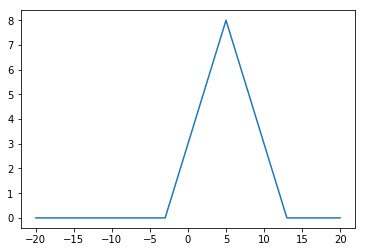

In [149]:
plt.plot(x,tri(x,5,8))